<a href="https://colab.research.google.com/github/Mrraven922/car_prices_analysis/blob/main/price_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:

#1 Setup

# Import libraries and upload data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preview
df = pd.read_csv('car_prices.csv')  # Make sure filename matches


In [139]:
#Basic Data Overview


# Shape, nulls, datatypes
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Shape: (558837, 16)

Missing values:
 year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Data types:
 year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


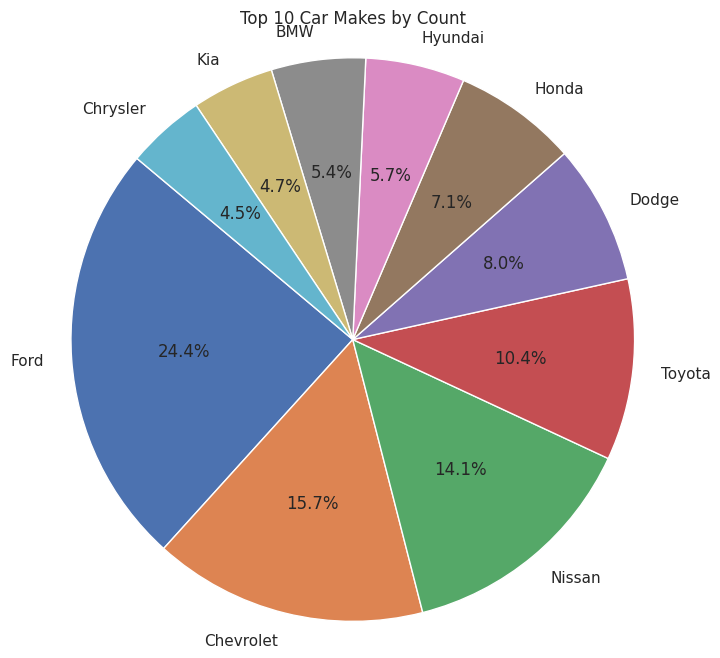

In [140]:
 #Analyze make (Top brands)

 import matplotlib.pyplot as plt

# Top 10 car makes by count
top_makes = df['make'].value_counts().head(10)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_makes.values, labels=top_makes.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Car Makes by Count")
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


/tmp/ipython-input-4009501105.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




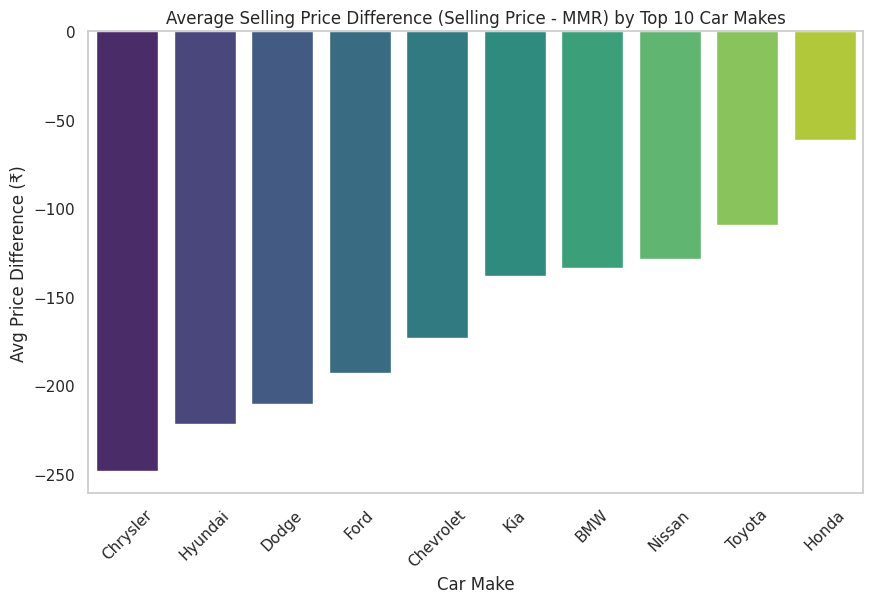

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create price_diff
df['price_diff'] = df['sellingprice'] - df['mmr']

# Top 10 car makes by count
top_makes = df['make'].value_counts().head(10).index

# Average price difference for top makes
avg_price_diff_by_make = (
    df[df['make'].isin(top_makes)]
    .groupby('make')['price_diff']
    .mean()
    .sort_values(ascending=True) # Sort in ascending order for bottom-up chart
)

# Reindex the dataframe to keep order in the barplot
avg_price_diff_by_make = avg_price_diff_by_make.reset_index()
avg_price_diff_by_make.columns = ['make', 'price_diff']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_diff_by_make, x='make', y='price_diff', palette="viridis") # Use a different color palette

plt.title("Average Selling Price Difference (Selling Price - MMR) by Top 10 Car Makes")
plt.xlabel("Car Make")
plt.ylabel("Avg Price Difference (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-4091128900.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




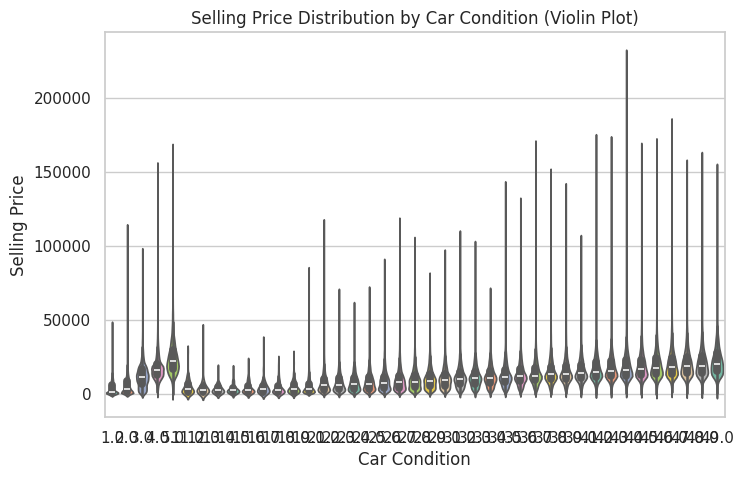

In [142]:
#Analyze condition vs Price

import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot of selling price by condition
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='condition', y='sellingprice', palette='Set2')

plt.title("Selling Price Distribution by Car Condition (Violin Plot)")
plt.xlabel("Car Condition")
plt.ylabel("Selling Price")
plt.grid(True, axis='y')
plt.show()



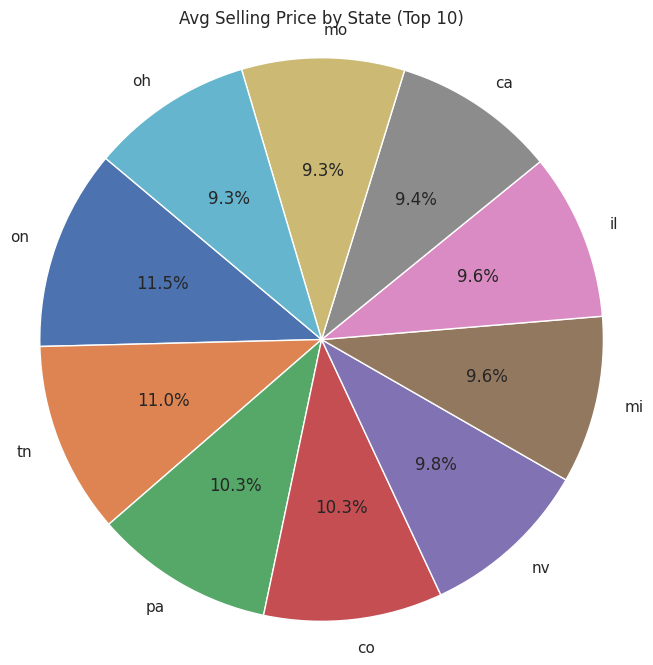

In [143]:
#Analyze state (regional impact)

import matplotlib.pyplot as plt

# Top 10 states by average selling price
state_price = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_price.values, labels=state_price.index, autopct='%1.1f%%', startangle=140)
plt.title("Avg Selling Price by State (Top 10)")
plt.axis('equal')  # Ensures pie is a circle
plt.show()


/tmp/ipython-input-2570053330.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



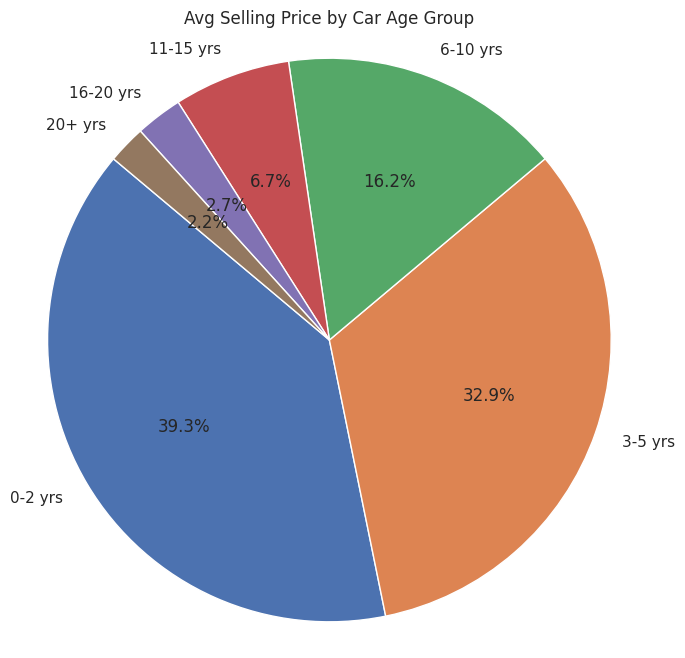

In [144]:
# Create & Analyze car_age

# Group car age into bins
bins = [0, 2, 5, 10, 15, 20, 100]
labels = ['0-2 yrs', '3-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '20+ yrs']
df_cleaned['age_group'] = pd.cut(df_cleaned['car_age'], bins=bins, labels=labels)

# Calculate average selling price per age group
avg_price_by_age = df_cleaned.groupby('age_group')['sellingprice'].mean()

# Drop age groups with NaN values for average selling price
avg_price_by_age = avg_price_by_age.dropna()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_price_by_age.values, labels=avg_price_by_age.index, autopct='%1.1f%%', startangle=140)
plt.title("Avg Selling Price by Car Age Group")
plt.axis('equal')  # Make pie a circle
plt.show()

/tmp/ipython-input-2909196685.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




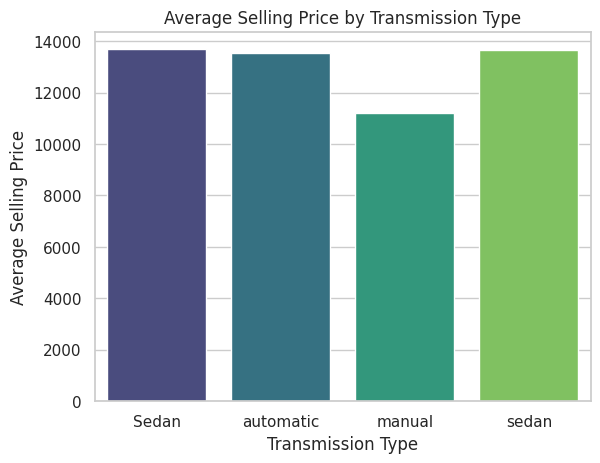

In [145]:
#9: Analyze transmission vs Price

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average selling price by transmission type
avg_price_by_transmission = df.groupby('transmission')['sellingprice'].mean().reset_index()

sns.barplot(data=avg_price_by_transmission, x='transmission', y='sellingprice', palette='viridis')
plt.title("Average Selling Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price")
plt.show()

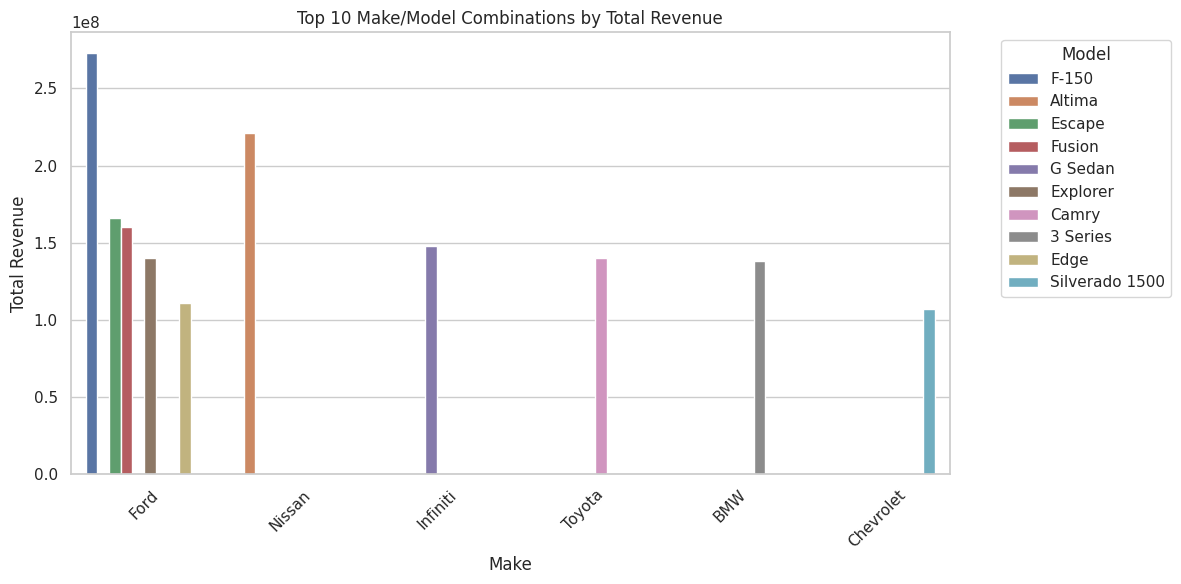

In [146]:
 #Top Makes & Models by Total Revenue
 # 📊 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 Load your dataset
# Replace with your CSV file path or use the one uploaded in Colab
df = pd.read_csv('car_prices.csv')  # Corrected filename

# 💰 Create a revenue column
df['revenue'] = df['sellingprice']

# 📈 Group by make and model and calculate total revenue
top_revenue = (
    df.groupby(['make', 'model'])['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
    .head(10)
)

# 🎨 Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue, x='make', y='revenue', hue='model')
plt.title("Top 10 Make/Model Combinations by Total Revenue")
plt.xlabel("Make")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-476246116.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-476246116.py:9: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/tmp/ipython-input-476246116.py:43: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



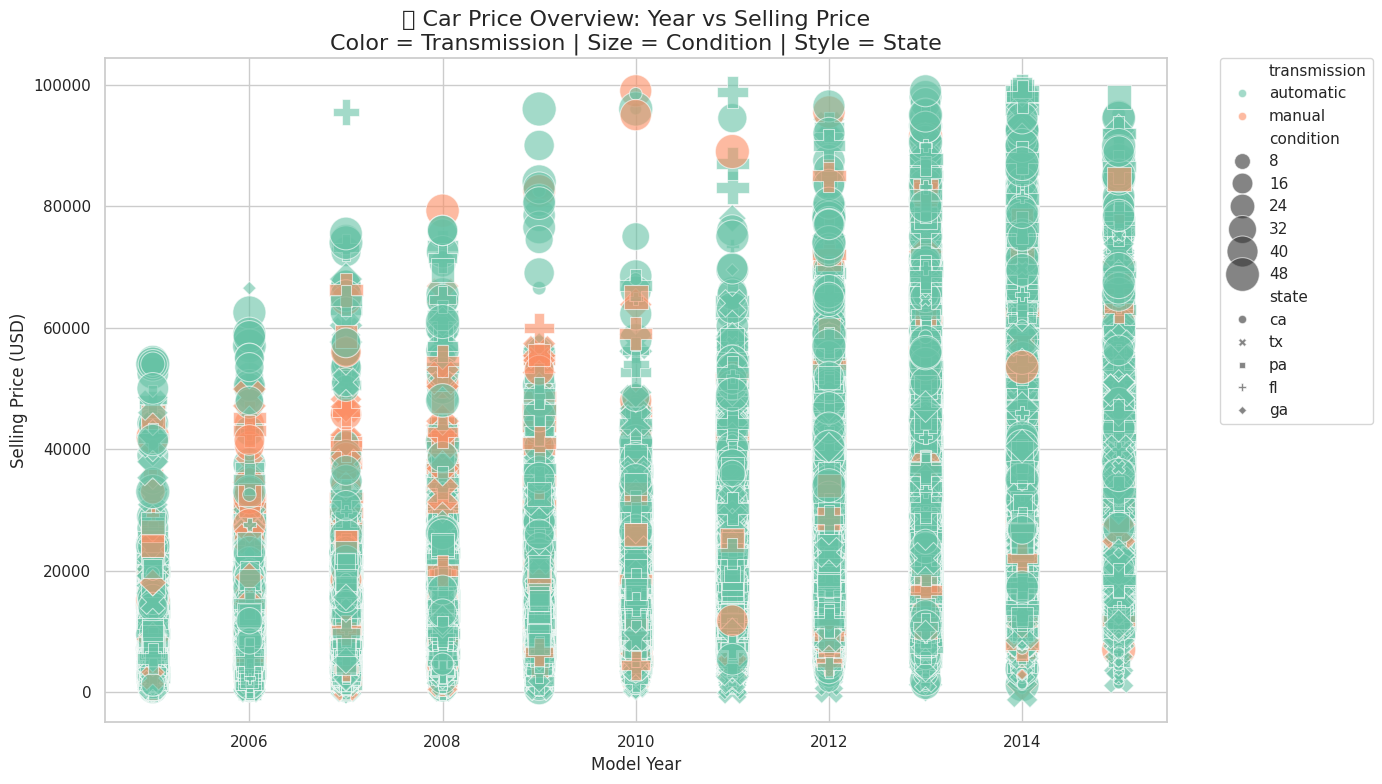

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("car_prices.csv")

# Preprocess
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')

# Filter to avoid clutter
top_states = df['state'].value_counts().head(5).index
top_trans = df['transmission'].value_counts().head(2).index

filtered = df[
    (df['state'].isin(top_states)) &
    (df['transmission'].isin(top_trans)) &
    (df['year'].between(2005, 2023)) &
    (df['sellingprice'] < 100000)
]

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=filtered,
    x='year', y='sellingprice',
    size='condition',
    hue='transmission',
    style='state',
    alpha=0.6,
    sizes=(50, 600),
    palette='Set2'
)

plt.title("🚗 Car Price Overview: Year vs Selling Price\nColor = Transmission | Size = Condition | Style = State", fontsize=16)
plt.xlabel("Model Year")
plt.ylabel("Selling Price (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
